# Machine Learning Day 1: 02/07/2024 - Basic Regression Models

### Regression vs Classification 

#### Regression

Regression is a predictive modeling technique that estimates the relationship between a target varibale and one 
or more predictor variables. It always outputs a continuous value. Typically used in Prediction, forecasting, and 
estimation of values. 

It is evaluated through the following metrics:
    
Mean Absolute Error (MAE)
Mean Squared Error (MSE)
Root Mean Squared Error (RMSE)
R-square (Coefficient of determination)


#### Classification 

Classification is predictive modeling technique which allocates labels to scenairios based on certain input features.
The output of this model is always a discrete class label. It is typically used for identication, detection, classification
(as per the name). 

It is evaluated through the following metrics:
Accuracy
Precision
Recall
F1 Score
AUC-ROC

### Model #1 - Linear Regression

Linear Regression is debately one of the most basic forms of predictive analysis. It examines whether a set of "predictor" 
variables can do a good job at predicting a "target" variable. 

In [4]:
import pandas as pd

In [10]:
df=pd.read_csv(r"C:\Users\Admin\Downloads\boston_housing.csv")

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [12]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [13]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [16]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [18]:
df.shape

(506, 14)

In [19]:
df.drop_duplicates()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


(array([[504.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [474.,  32.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [506.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [506.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [506.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [506.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [226., 280.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [506.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [506.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,  17., 123., 130.,  71.,  28.,   0.,   0., 137.],
        [506.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [ 24.,  12.,   4.,   9.,  43., 414.,   0.,   0.,   0.,   0.],
        [506.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [506.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]]),
 array([  0. ,  71

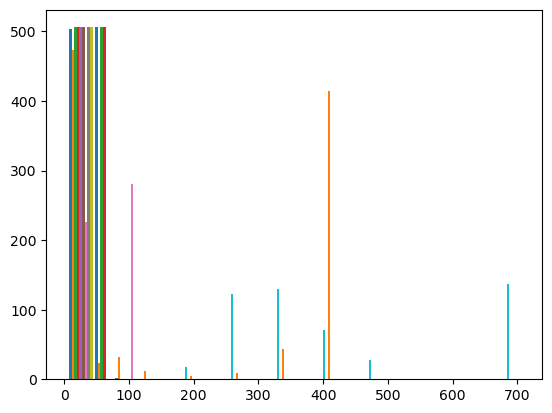

In [20]:
plt.hist(df)